### 2020 Lavickova et al. A self-regenerating synthetic cell model: Model plots, GFP DNA titration
Nadanai Laohakunakorn (University of Edinburgh), nadanai.laohakunakorn@ed.ac.uk

In [1]:
using DelimitedFiles
using Plots
using DifferentialEquations
using ProgressBars
using Statistics
using PyCall

include("../scripts/models.jl");
include("../scripts/callbacks.jl");
include("../scripts/solve.jl");

In [2]:
# Global settings
Plots.pyplot()
PATH_OUT = "../output/"
fntsm = Plots.font("sans-serif", pointsize=round(14.0))
fntlg = Plots.font("sans-serif", pointsize=round(18.0))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntlg, legendfont=fntsm)

TMAX = 30.0*60 # in minutes
INTERVAL_DIL = 15.0 # in minutes
DIL_FRAC = 0.2;
NSPECIES = 7
SWITCHTIMES = [4.0,16.0] # Time to swap between experimental stages

# Define names for species indices
idx_R=1;
idx_dT=2;
idx_dG=3;
idx_mT=4;
idx_mG=5;
idx_pT=6;
idx_pG=7;

idx_TX = 8;
idx_TL = 9;

## 5. GFP DNA titration

66.7%┣██████████████████████████████               ┫ 2/3 [00:06<00:06, 0.2 it/s]

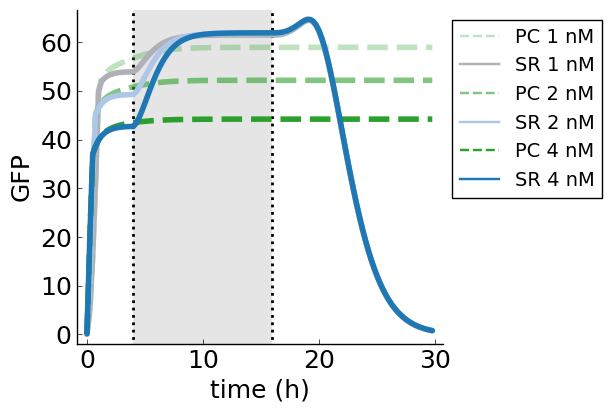

100.0%┣████████████████████████████████████████████┫ 3/3 [00:06<00:00, 0.3 it/s]


In [3]:
CONCS_GFP = [1.0,2.0,4.0]
colours = ["#afb1b6","#aec7e8","#1f77b4"]
alphas = [0.3,0.6,1.0]
labels = [" 1 nM", " 2 nM", " 4 nM"]

p = plot(grid=:false,legend=:outertopright,label="PC",color="#2ca02c",xaxis="time (h)",yaxis="GFP",lw=4)
vspan!([4,16],fill=:black,alpha=:0.1,label=""); vline!([4,16],color=:black,linestyle=:dot,linewidth=2,label="");
FN="GFPtitration_TS.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=0.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

for i in ProgressBar((1:size(CONCS_GFP)[1]))
    CONCS = exp10.(range(-4, stop=1, length=30))
    ratio_SRPC = []

    # Set initial conditions

    R0=100.0;
    dT0=1e-2;
    dG0=CONCS_GFP[i];
    mT0=0.0;
    mG0=0.0;
    pT0=1.0;
    pG0=0.0;

    alpha=0.7;
    beta=0.1*alpha;
    K=1.0;
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];

    TSAVE = collect(0:15:TMAX).+1 
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
    t = solU.t/60;
    pGPC = [datum for subarr in solU.u for datum in subarr[idx_pG]];
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
    t = solU.t/60;
    pGSR = [datum for subarr in solU.u for datum in subarr[idx_pG]];
    
    plot!(t,pGPC,label="PC"*labels[i],lw=4,color="#2ca02c",alpha=alphas[i],line=(:dash,4))
    plot!(t,pGSR,label="SR"*labels[i],lw=4,color=colours[i])
end
p # Show plot
savefig(PATH_OUT*FN)

66.7%┣██████████████████████████████               ┫ 2/3 [00:10<00:10, 0.1 it/s]

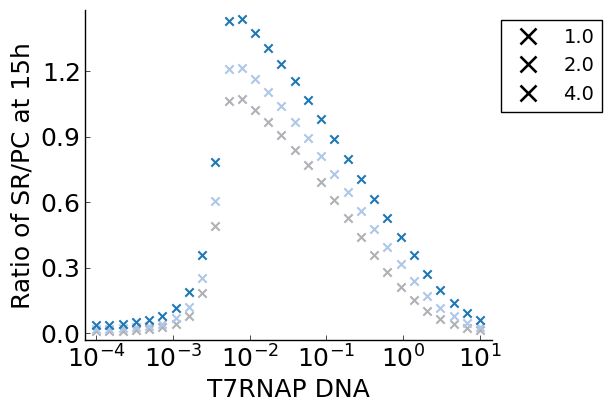

100.0%┣████████████████████████████████████████████┫ 3/3 [00:15<00:00, 0.1 it/s]


In [4]:
# 1.2 Ratio curve

CONCS_GFP = [1.0,2.0,4.0]
colours = ["#afb1b6","#aec7e8","#1f77b4"]

p1 = plot(grid=:false,legend=:outertopright,xaxis="T7RNAP DNA",yaxis="Ratio of SR/PC at 15h",
    xscale=:log10)
FN="GFPtitration_ratio.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=0.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

for i in ProgressBar((1:size(CONCS_GFP)[1]))
    CONCS = exp10.(range(-4, stop=1, length=30))
    ratio_SRPC = []

    # Set initial conditions

    R0=100.0;
    dT0=0.0;
    dG0=CONCS_GFP[i];
    mT0=0.0;
    mG0=0.0;
    pT0=1.0;
    pG0=0.0;

    alpha=0.7;
    beta=0.1*alpha;
    K=1.0;
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];

    TSAVE = collect(0:15:TMAX).+1 
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
    t = solU.t/60;
    pGPC = [datum for subarr in solU.u for datum in subarr[idx_pG]];
    # Index at 15h
    idx = findall(x -> x == 901,TSAVE)

    for conc in CONCS
        dT0=conc
        u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
        params = [alpha,beta,K];
        solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
        pG = [datum for subarr in solU.u for datum in subarr[idx_pG]];
        append!(ratio_SRPC,pG[idx]/pGPC[idx])
    end
    
    plot!(CONCS,ratio_SRPC,seriestype=:scatter,
    markershape=:x,label=CONCS_GFP[i],markersize=6,color=colours[i])

end

p1 # Show plot
savefig(PATH_OUT*FN)